In [ ]:
SACAR LOS GENEROS DE CADA AÑO ****************************

In [ ]:
**********************************************************

In [7]:
import pandas as pd

# Crear un diccionario con el año como clave y un conjunto de géneros como valor
generos_por_ano = {}
for index, fila in df.dropna(subset=['Año', 'Géneros']).iterrows():
    ano = int(fila['Año'])
    generos = fila['Géneros']
    if ano not in generos_por_ano:
        generos_por_ano[ano] = set()
    generos_por_ano[ano].update(generos)

# Crear un DataFrame a partir del diccionario
data = {'Año': list(generos_por_ano.keys()), 'Géneros': list(generos_por_ano.values())}
df_generos_por_ano = pd.DataFrame(data)

# Convertir los conjuntos de géneros en listas para que se visualicen correctamente en el DataFrame
df_generos_por_ano['Géneros'] = df_generos_por_ano['Géneros'].apply(list)

# Mostrar el DataFrame
print(df_generos_por_ano)


     Año                                            Géneros
0   1963  [Toros, Drama romántico, Capa y espada, Sátira...
1   1984  [Guerra Civil Española, Cine quinqui, Comedia ...
2   1961  [Comedia romántica, Pobreza, Colegios & Univer...
3   1953  [Siglo XVI, Pobreza, Religión, Neorrealismo, C...
4   1956  [Toros, Pobreza, Comedia dramática, Drama romá...
..   ...                                                ...
87  1940  [Discapacidad visual, Basado en hechos reales,...
88  1935                 [Comedia, Drama, Musical, Romance]
89  1939       [Celos, Drama, Comedia, Vida rural, Navidad]
90  1941  [Melodrama, Guerra Civil Española, Años 20, Po...
91  1930  [Amistad, Drama, Cine mudo, Cine dentro del cine]

[92 rows x 2 columns]


In [ ]:
**********************************************************

In [ ]:
NUBES DE PALABRAS POR EPOCAS *****************************

In [ ]:
**********************************************************

In [32]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
ruta_archivo = 'data/data_peliculas_transformado.csv'
datos = pd.read_csv(ruta_archivo)

# Convertir 'Año' a formato de fecha y extraer el año
datos['Año'] = pd.to_datetime(datos['Año'], errors='coerce')
datos['Año'] = datos['Año'].dt.year

# Convertir 'Géneros' a una lista de cadenas
datos['Géneros'] = datos['Géneros'].apply(lambda x: eval(x))

# Definir los períodos
periodos = [(1900, 1936), (1936, 1960), (1960, 1975), (1975, 1982), (1982, 1990), (1990, 2008), (2008, 2023)]

# Inicializar un diccionario para almacenar los géneros para cada período
conteo_generos = {}

# Bucle para contar los géneros en cada período
for inicio, fin in periodos:
    # Filtrar los datos para el período actual
    mascara = (datos['Año'] >= inicio) & (datos['Año'] <= fin)
    datos_filtrados = datos[mascara]
    
    # Aplanar la lista de géneros para todas las películas en el período
    todos_los_generos = [genero for sublist in datos_filtrados['Géneros'] for genero in sublist]
    
    # Contar la frecuencia de cada género, excluyendo 'Drama' y 'Comedia'
    conteo_genero = pd.Series(todos_los_generos).value_counts()
    conteo_genero = conteo_genero.drop(labels=['Drama', 'Comedia'], errors='ignore')
    
    # Almacenar los resultados en el diccionario
    conteo_generos[(inicio, fin)] = conteo_genero

# Bucle para identificar los géneros más destacados en cada período
for periodo, conteo_genero in conteo_generos.items():
    # Obtener los géneros más frecuentes
    generos_destacados = conteo_genero.head(3).index.tolist()
    
    # Convertir la lista de géneros a una cadena para mostrar
    generos_str = ', '.join(generos_destacados)
    
    # Mostrar el resultado
    print(f'De {periodo[0]} a {periodo[1]}, los géneros más destacados son {generos_str}.')


De 1900 a 1936, los géneros más destacados son Musical, Cine mudo, Cine dentro del cine.
De 1936 a 1960, los géneros más destacados son Musical, Siglo XIX, Cine negro.
De 1960 a 1975, los géneros más destacados son Musical, Terror, Romance.
De 1975 a 1982, los géneros más destacados son Terror, Erótico, Cine quinqui.
De 1982 a 1990, los géneros más destacados son Terror, Thriller, Crimen.
De 1990 a 2008, los géneros más destacados son Thriller, Romance, Intriga.
De 2008 a 2023, los géneros más destacados son Thriller, Romance, Terror.


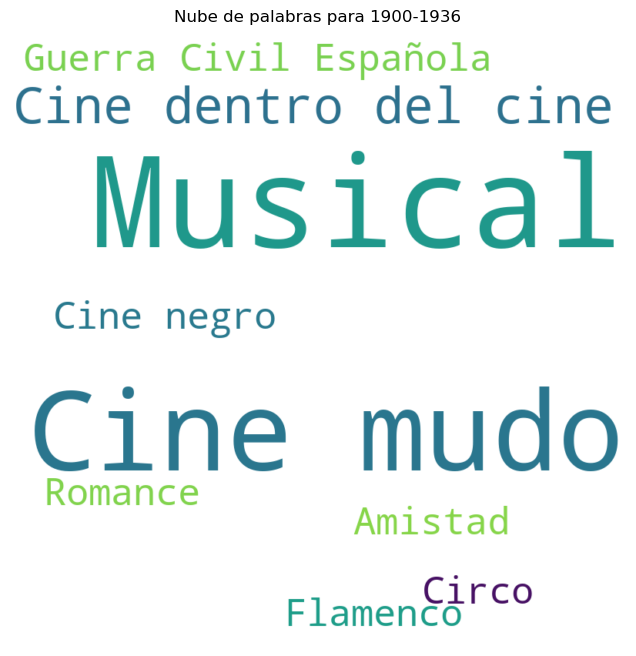

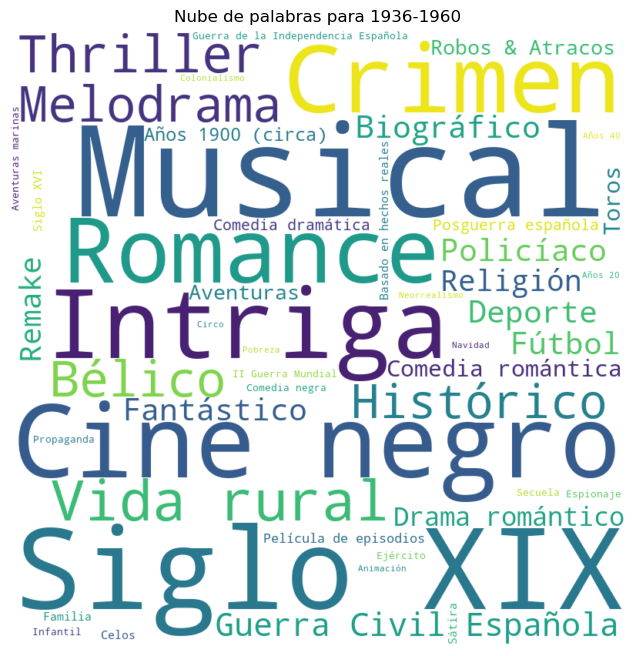

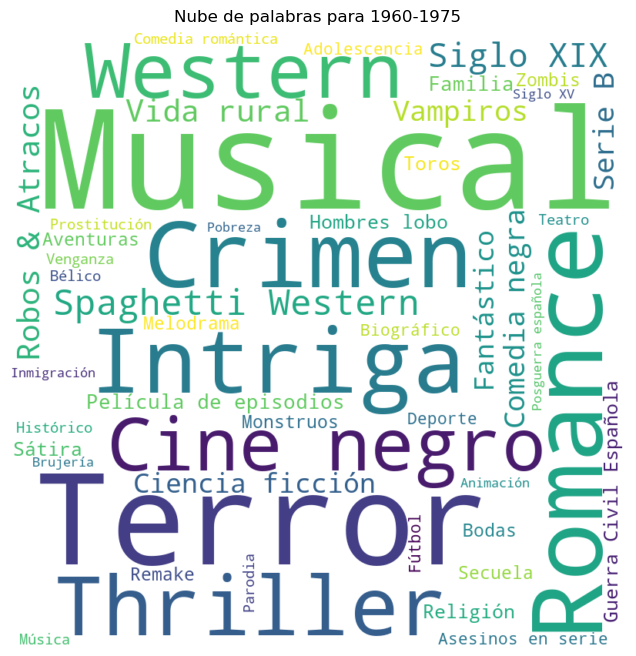

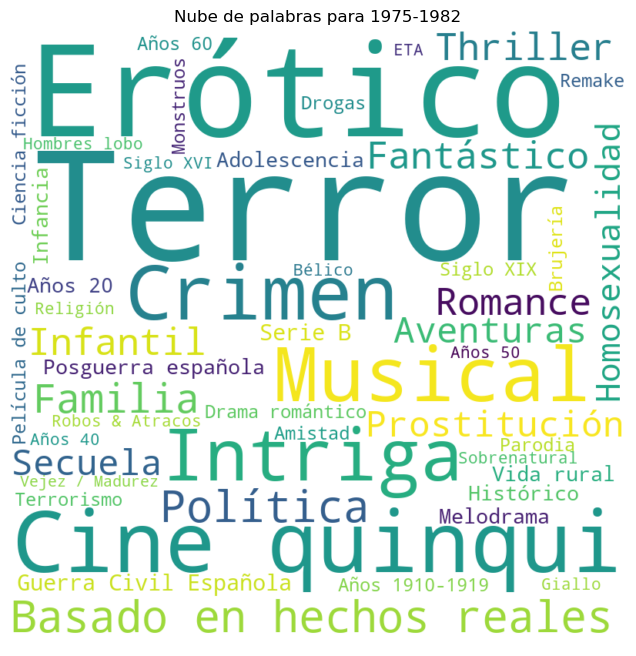

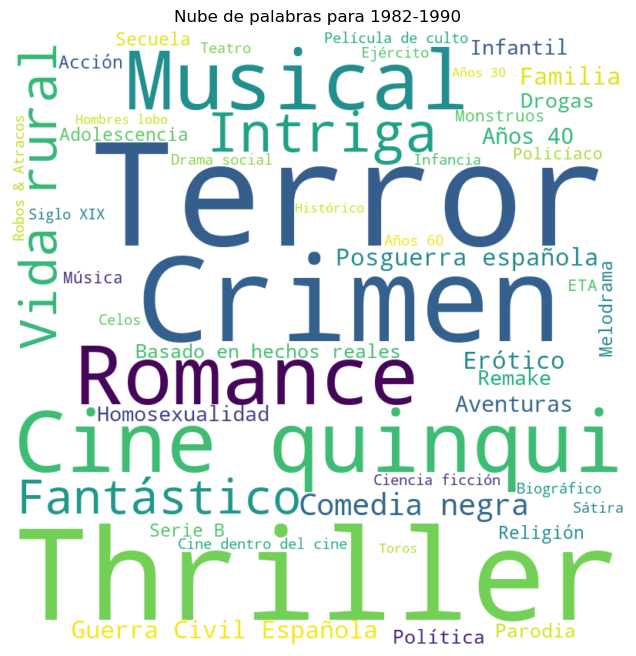

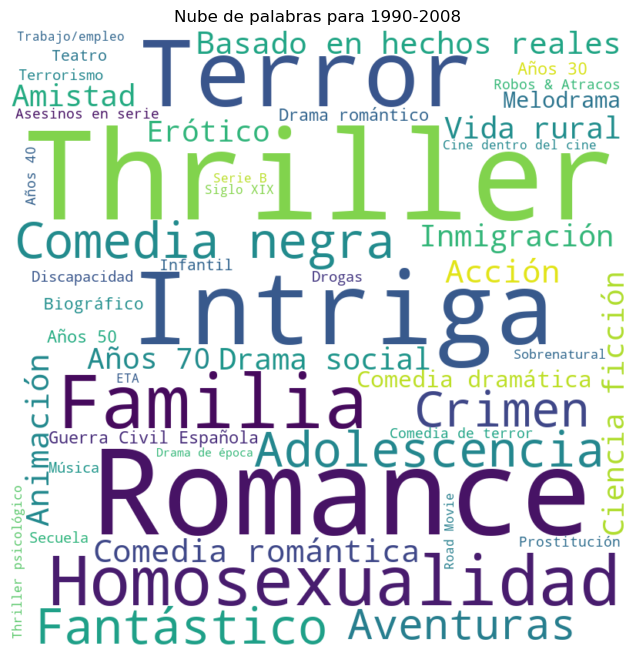

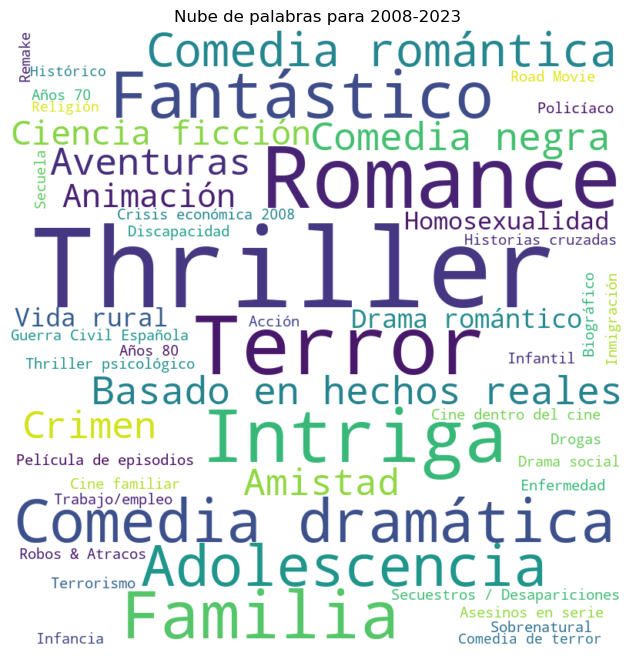

De 1900 a 1936, los géneros más destacados son Musical, Cine mudo, Cine dentro del cine.
De 1936 a 1960, los géneros más destacados son Musical, Siglo XIX, Cine negro.
De 1960 a 1975, los géneros más destacados son Musical, Terror, Romance.
De 1975 a 1982, los géneros más destacados son Terror, Erótico, Cine quinqui.
De 1982 a 1990, los géneros más destacados son Terror, Thriller, Crimen.
De 1990 a 2008, los géneros más destacados son Thriller, Romance, Intriga.
De 2008 a 2023, los géneros más destacados son Thriller, Romance, Terror.


In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Etiquetas editables
titulo_nube_palabras = 'Nube de palabras para {}-{}'
generos_destacados_label = 'De {} a {}, los géneros más destacados son {}.'

# Cargar el archivo CSV en un DataFrame
ruta_archivo = 'data/data_peliculas_transformado.csv'
datos = pd.read_csv(ruta_archivo)

# Convertir 'Año' a formato de fecha y extraer el año
datos['Año'] = pd.to_datetime(datos['Año'], errors='coerce')
datos['Año'] = datos['Año'].dt.year

# Convertir 'Géneros' a una lista de cadenas
datos['Géneros'] = datos['Géneros'].apply(lambda x: eval(x))

# Definir los períodos
periodos = [(1900, 1936), (1936, 1960), (1960, 1975), (1975, 1982), (1982, 1990), (1990, 2008), (2008, 2023)]

# Inicializar un diccionario para almacenar los géneros para cada período
conteo_generos = {}

# Bucle para contar los géneros en cada período
for inicio, fin in periodos:
    # Filtrar los datos para el período actual
    mascara = (datos['Año'] >= inicio) & (datos['Año'] <= fin)
    datos_filtrados = datos[mascara]
    
    # Aplanar la lista de géneros para todas las películas en el período
    todos_los_generos = [genero for sublist in datos_filtrados['Géneros'] for genero in sublist]
    
    # Contar la frecuencia de cada género, excluyendo 'Drama' y 'Comedia'
    conteo_genero = pd.Series(todos_los_generos).value_counts()
    conteo_genero = conteo_genero.drop(labels=['Drama', 'Comedia'], errors='ignore')
    
    # Almacenar los resultados en el diccionario
    conteo_generos[(inicio, fin)] = conteo_genero

# Función para crear y mostrar una nube de palabras para un período dado
def mostrar_nube_palabras(periodo, conteo_genero):
    # Crear una nube de palabras
    nube_palabras = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(conteo_genero)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(8, 8))
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo_nube_palabras.format(periodo[0], periodo[1]))
    plt.show()

# Bucle para crear una nube de palabras para cada período
for periodo, conteo_genero in conteo_generos.items():
    mostrar_nube_palabras(periodo, conteo_genero)

# Bucle para identificar los géneros más destacados en cada período
for periodo, conteo_genero in conteo_generos.items():
    # Obtener los géneros más frecuentes
    generos_destacados = conteo_genero.head(3).index.tolist()
    
    # Convertir la lista de géneros a una cadena para mostrar
    generos_str = ', '.join(generos_destacados)
    
    # Mostrar el resultado
    print(generos_destacados_label.format(periodo[0], periodo[1], generos_str))


In [1]:
# Importar la biblioteca pandas
import pandas as pd

# Cargar los datos del archivo CSV
ruta_archivo = 'data/data_peliculas_transformado_filtrado.csv'
datos = pd.read_csv(ruta_archivo)

# Extraer los géneros únicos de la columna 'Géneros'
generos_unicos = set()
datos['Géneros'].dropna().apply(lambda x: generos_unicos.update(x.split(',')))

# Contar el número de géneros únicos
numero_generos_unicos = len(generos_unicos)
numero_generos_unicos

514

In [6]:
# Importar la biblioteca pandas
import pandas as pd

# Importar la clase Counter de la biblioteca collections
from collections import Counter

# Cargar los datos del archivo CSV
ruta_archivo = 'data/data_peliculas_transformado_filtrado.csv'
datos = pd.read_csv(ruta_archivo)

# Contar la frecuencia de cada género
conteo_generos = Counter()
datos['Géneros'].dropna().apply(lambda x: conteo_generos.update(x.split(',')))

# Obtener los 25 géneros más comunes
top_25_generos = conteo_generos.most_common(25)
top_25_generos


[("['Drama'", 1032),
 ("['Comedia'", 736),
 ("['Comedia']", 357),
 (" 'Drama'", 331),
 ("['Drama']", 254),
 ("['Thriller'", 203),
 (" 'Comedia'", 198),
 ("['Terror'", 183),
 (" 'Romance'", 180),
 (" 'Thriller'", 121),
 (" 'Intriga'", 103),
 (" 'Crimen'", 93),
 (" 'Fantástico'", 92),
 ("['Intriga'", 88),
 (" 'Familia']", 78),
 ("['Romance'", 71),
 ("['Animación'", 68),
 (" 'Comedia negra'", 65),
 (" 'Crimen']", 62),
 (" 'Familia'", 61),
 (" 'Terror'", 61),
 (" 'Basado en hechos reales'", 60),
 (" 'Musical']", 57),
 (" 'Adolescencia']", 52),
 (" 'Comedia romántica']", 52)]